In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving email.xlsx to email.xlsx


In [ ]:
df = pd.read_excel("email.xlsx")
print(df.head())

     EmailID             Sender  SubjectLength  BodyLength  HasAttachments  \
0  EMAIL8000  user0@example.com             88         494               1   
1  EMAIL8001  user1@example.com             29        1466               1   
2  EMAIL8002  user2@example.com             81        1399               0   
3  EMAIL8003  user3@example.com             37        1503               0   
4  EMAIL8004  user4@example.com             93        1546               0   

   ContainsLinks  NumRecipients Priority  IsReply  ContainsSpamWords  \
0              1              4     High        0                  0   
1              1              1      Low        1                  0   
2              1              4   Normal        1                  1   
3              0              7   Normal        0                  0   
4              0              3     High        1                  1   

   SenderReputationScore  TimeOfDay Label  
0                   0.44      Night   Ham  
1         

In [ ]:
# Drop columns only if they are in the DataFrame
columns_to_drop = ['EmailID', 'Sender', 'TimeOfDay']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
print(df.head())

   SubjectLength  BodyLength  HasAttachments  ContainsLinks  NumRecipients  \
0             88         494               1              1              4   
1             29        1466               1              1              1   
2             81        1399               0              1              4   
3             37        1503               0              0              7   
4             93        1546               0              0              3   

   Priority  IsReply  ContainsSpamWords  SenderReputationScore  Label  
0         0        0                  0                   0.44      0  
1         1        1                  0                   0.82      1  
2         2        1                  1                   0.92      0  
3         2        0                  0                   0.64      1  
4         0        1                  1                   0.82      1  


In [ ]:
null_values = data.isnull().sum()
print(null_values)

SubjectLength            0
BodyLength               0
HasAttachments           0
ContainsLinks            0
NumRecipients            0
Priority                 0
IsReply                  0
ContainsSpamWords        0
SenderReputationScore    0
Label                    0
dtype: int64


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Optional: Check how many rows were removed
print(f"Remaining rows after removing duplicates: {len(df)}")
print(df.head())


Remaining rows after removing duplicates: 399
   SubjectLength  BodyLength  HasAttachments  ContainsLinks  NumRecipients  \
0             88         494               1              1              4   
1             29        1466               1              1              1   
2             81        1399               0              1              4   
3             37        1503               0              0              7   
4             93        1546               0              0              3   

   Priority  IsReply  ContainsSpamWords  SenderReputationScore  Label  
0         0        0                  0                   0.44      0  
1         1        1                  0                   0.82      1  
2         2        1                  1                   0.92      0  
3         2        0                  0                   0.64      1  
4         0        1                  1                   0.82      1  


In [ ]:
# Fill missing email body text with empty string
df['BodyLength'] = df['BodyLength'].fillna(0)  # Assuming numeric length; use '' if it's actual text

# Drop rows with missing target label
df = df.dropna(subset=['Label'])
print(df.head())

   SubjectLength  BodyLength  HasAttachments  ContainsLinks  NumRecipients  \
0             88         494               1              1              4   
1             29        1466               1              1              1   
2             81        1399               0              1              4   
3             37        1503               0              0              7   
4             93        1546               0              0              3   

   Priority  IsReply  ContainsSpamWords  SenderReputationScore  Label  
0         0        0                  0                   0.44      0  
1         1        1                  0                   0.82      1  
2         2        1                  1                   0.92      0  
3         2        0                  0                   0.64      1  
4         0        1                  1                   0.82      1  


In [ ]:
# Convert all object-type (text) columns to lowercase safely
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype(str).str.lower()


In [ ]:
# Define a function to clean text
def clean_text(text):
    text = str(text)                         # Ensure it's a string
    text = text.lower()                      # Convert to lowercase
    text = re.sub(r'\n', ' ', text)          # Remove newline characters
    text = re.sub(r'\r', ' ', text)          # Remove carriage returns
    text = re.sub(r'https?://\S+', '', text) # Remove URLs
    text = re.sub(r'\d+', '', text)          # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)      # Remove punctuation
    text = re.sub(r'\s+', ' ', text)         # Remove extra whitespace
    return text.strip()                      # Remove leading/trailing whitespace

# Apply to all object-type (text) columns
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].apply(clean_text)

In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize Lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
def clean_text(text):
    words = text.split()  # Tokenize text
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize words
    filtered_words = [word for word in lemmatized_words if word.lower() not in stop_words]  # Remove stopwords
    return ' '.join(filtered_words)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the correct target column
data['label_encoded'] = label_encoder.fit_transform(data['Label'])


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# Features: all columns except 'Label'
X = data.drop('Label', axis=1)

# Target: the 'Label' column
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

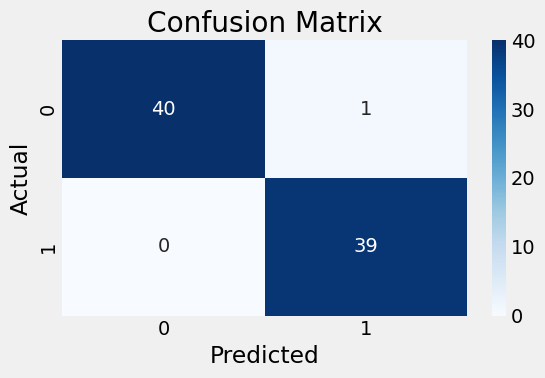

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.97      1.00      0.99        39

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings

# Plot style and warning suppression
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

# Step 2: Load or simulate email dataset
# For demonstration, let's assume 'data' is already loaded and cleaned
# Columns: SubjectLength, BodyLength, HasAttachments, ContainsLinks, NumRecipients,
# Priority, IsReply, ContainsSpamWords, SenderReputationScore, Label

# Step 3: Feature and Target Split
X = data.drop('Label', axis=1)
y = data['Label']

# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Step 6: Train KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Step 7: Predictions and Evaluation
y_pred = knn.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
